In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm, colors
import glob

from numba import njit, vectorize, float32

from typing import Callable, Optional, Union

import hoomd
import gsd.hoomd

import sys
import time
import pickle
import gc
import pathlib
import os

import signac

from scipy import optimize

In [2]:
from monk import nb, prep, pair, render, utils, grid, workflow
import freud

parent = pathlib.Path(os.getcwd()).parent / "config.yaml"
config = workflow.get_config(parent.as_posix())

# mpl.rcParams["text.usetex"] = True
# mpl.rcParams["text.latex.preamble"].append(r'\usepackage{xfrac}')

In [3]:
project: signac.Project = signac.get_project(root=config['root'])
project.doc

{'avail_seed': 2, 'dt': 0.005, 'step_unit': 1000, 'temp_steps': 20, 'equil_time': 40, 'run_time': 10, 'max_alpha_time': 1000, 'alpha_iters': 10, '_status': {}}

In [4]:
plt.figure(figsize=(5,4))

markers = {"KA_LJ": ".", "KA_WCA": "s"}
# cmap = cm.jet
# norm = colors.Normalize(vmin=1.1, vmax=1.6)

for i, job in enumerate(project):

    pot = job.sp["pot"]
    marker = markers[pot]
    # col = cmap(norm(job.sp["rho"]))

    print(job.sp["pot"])

    with job:
        sims = sorted(glob.glob("fine/equil_*.gsd"))
        traj = gsd.hoomd.open(sims[0], "rb")
        snap = traj[0]
        print(sims[0])
    break
        
# plt.yscale("log")
# plt.xlabel(r"$\frac{T_g}{T}$", size="xx-large")
# plt.ylabel(r"$\tau_{\alpha}$", size="xx-large")

# lines = [
#     plt.Line2D([0], [0], color='black', lw=0, marker="."),
#     plt.Line2D([0], [0], color='black', lw=0, marker="s"),
# ]
# plt.legend(lines, ["LJ", "WCA"], loc="best")
# plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label=r"$\rho$")

# plt.ylim(1e0, 1e4)
# plt.xlim(0.1, 0.8)

# plt.text(0.7, 0.1, r"$\rho=1.2$", transform=plt.gca().transAxes)

# plt.tight_layout()

# plt.savefig("/home/ian/Pictures/monk/2d-esl/angel-plot.png", dpi=200)

KA_LJ
fine/equil_temp-0.300.gsd


<Figure size 360x288 with 0 Axes>

In [5]:
plt.figure(figsize=(5,5), dpi=200)

hex_order = freud.order.Hexatic(k=6)
hex_order.compute(system=snap)

hex: np.ndarray = hex_order.order
hex = np.absolute(hex)

cmap = cm.jet
norm = colors.Normalize(vmin=hex.min(), vmax=hex.max())

plt.scatter(snap.particles.position[:, 0], snap.particles.position[:, 1], s=0.1, c=cmap(norm(hex)), alpha=0.5, label=pot)

hex_order.plot()


AttributeError: 'freud.order.Hexatic' object has no attribute 'order'

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:title={'center':'Cluster Frequency'}, xlabel='Keys of 10 largest clusters (total clusters: 21570)', ylabel='Number of particles'>

<Figure size 1000x1000 with 0 Axes>

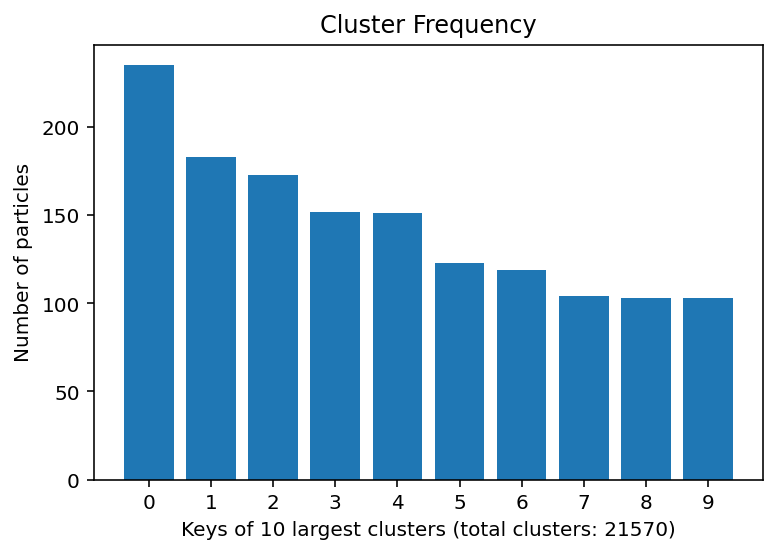

In [39]:
plt.figure(figsize=(5,5), dpi=200)

order = freud.order.SolidLiquid(6, 0.7, 4)
order.compute(system=snap, neighbors={'mode': 'nearest', 'num_neighbors': 6})

order.plot()

# sl: np.ndarray = order.order
# hex = np.absolute(hex)

# cmap = cm.jet
# norm = colors.Normalize(vmin=hex.min(), vmax=hex.max())

# plt.scatter(snap.particles.position[:, 0], snap.particles.position[:, 1], s=0.1, c=cmap(norm(hex)), alpha=0.5, label=pot)


/tmp/ipykernel_3351664/649715152.py:3: FreudDeprecationWarning: This class is deprecated and will be removed in version 3.0
  order = freud.order.Translational()


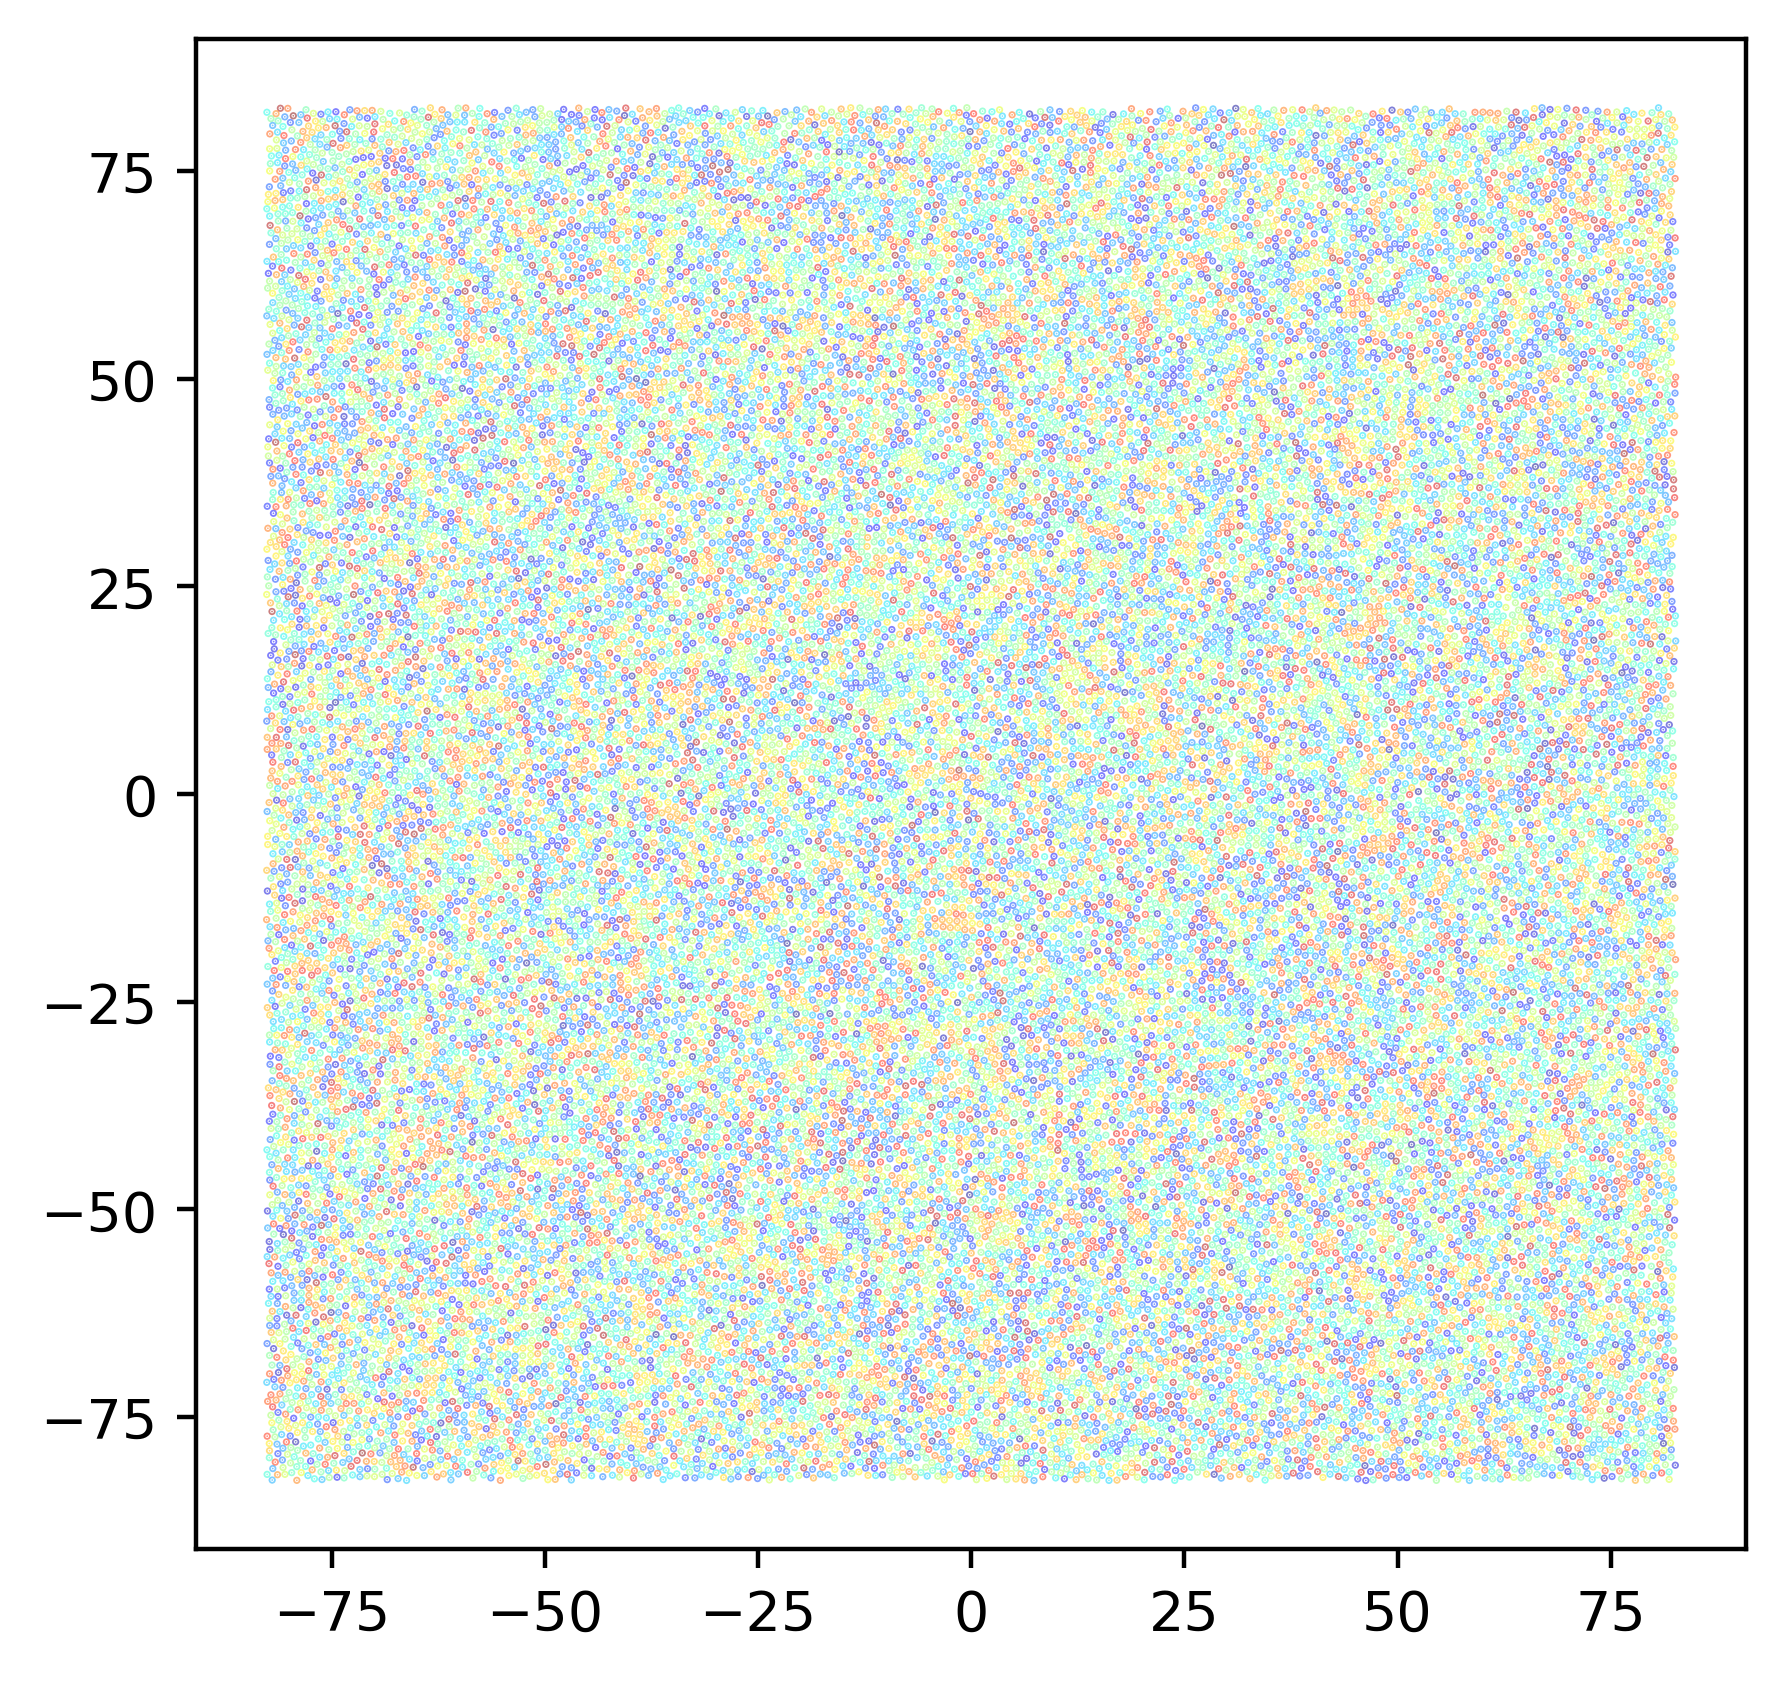

In [41]:
plt.figure(figsize=(5,5), dpi=200)

order = freud.order.Translational()
order.compute(system=snap)

sl: np.ndarray = order.particle_order
hex = np.absolute(hex)

cmap = cm.jet
norm = colors.Normalize(vmin=hex.min(), vmax=hex.max())

plt.scatter(snap.particles.position[:, 0], snap.particles.position[:, 1], s=0.1, c=cmap(norm(hex)), alpha=0.5, label=pot)
